In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Load some necessary libraries to R so that we can have access to the functions that we need.

In [3]:
set.seed(20000)

 Set a specifc number of seed to make sure that our data is reproducible 

In [4]:
data <- read_csv("data/heartDisease.csv")
data

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Table 1

We load the data we downloaded, since this is csv file so we need to use funtion read_csv to read the file.

In [5]:
nrow(data)

[1] 303

In order to know whether the number of k is suitable for our data or not we need to know the amount of data we have.(To avoid underfitting or overfitting by choosing really large or small K)

In [6]:
select_data2 <- select(data, age, trestbps, chol, target)
select_data2

age,trestbps,chol,target
<dbl>,<dbl>,<dbl>,<dbl>
63,145,233,1
37,130,250,1
41,130,204,1
⋮,⋮,⋮,⋮
68,144,193,0
57,130,131,0
57,130,236,0


Table 2

Using select function to select the data that we actually need to use in our further analysis. In this case we need to use age, trestbps, chol, and target.

In [7]:
select_data1 <- mutate(select_data2, actual_target = as_factor(target))
select_data1

age,trestbps,chol,target,actual_target
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,1,1
37,130,250,1,1
41,130,204,1,1
⋮,⋮,⋮,⋮,⋮
68,144,193,0,0
57,130,131,0,0
57,130,236,0,0


Table 3

For Table 3 since original colonm "target" is numerical variable and we cannot predict based on numerical variable in classificatrion. So we need to use as_factor to change the numerical variable to categrical variable.

In [8]:
select_data <- select(select_data1, age, trestbps, chol, actual_target)
select_data

# select_data_old %>% group_by(actual_target) %>% summarize(count = n())
# select_data_young %>% group_by(actual_target) %>% summarize(count = n())

age,trestbps,chol,actual_target
<dbl>,<dbl>,<dbl>,<fct>
63,145,233,1
37,130,250,1
41,130,204,1
⋮,⋮,⋮,⋮
68,144,193,0
57,130,131,0
57,130,236,0


Table 4

For table 4 since we don't need the colonm of "target" we remove that colonm by selecting other colonms.(keep "actual_target" as the variable that we want to predict.)

In [9]:
select_data_young <- filter(select_data, age < 65)
select_data_young

age,trestbps,chol,actual_target
<dbl>,<dbl>,<dbl>,<fct>
63,145,233,1
37,130,250,1
41,130,204,1
⋮,⋮,⋮,⋮
45,110,264,0
57,130,131,0
57,130,236,0


Table 5

Since we want to see whether age will have any corrolation with our other predictors or not we fillter the age that under 65.

In [10]:
select_data_old <- filter(select_data, age >= 65)
select_data_old

age,trestbps,chol,actual_target
<dbl>,<dbl>,<dbl>,<fct>
66,150,226,1
69,140,239,1
71,160,302,1
⋮,⋮,⋮,⋮
67,120,237,0
67,152,212,0
68,144,193,0


Table 6

Since we want to see whether age will have any corrolation with our other predictors or not we fillter the age that above 65.

Before the graphs: Scatterplots depict the relationship between two variables well, providing an optimal way to see how effective trestbps and chol are at predicting heart disease diagnosis.  This is why scatterplots were made for Graph 1, 2, 3, and 4.


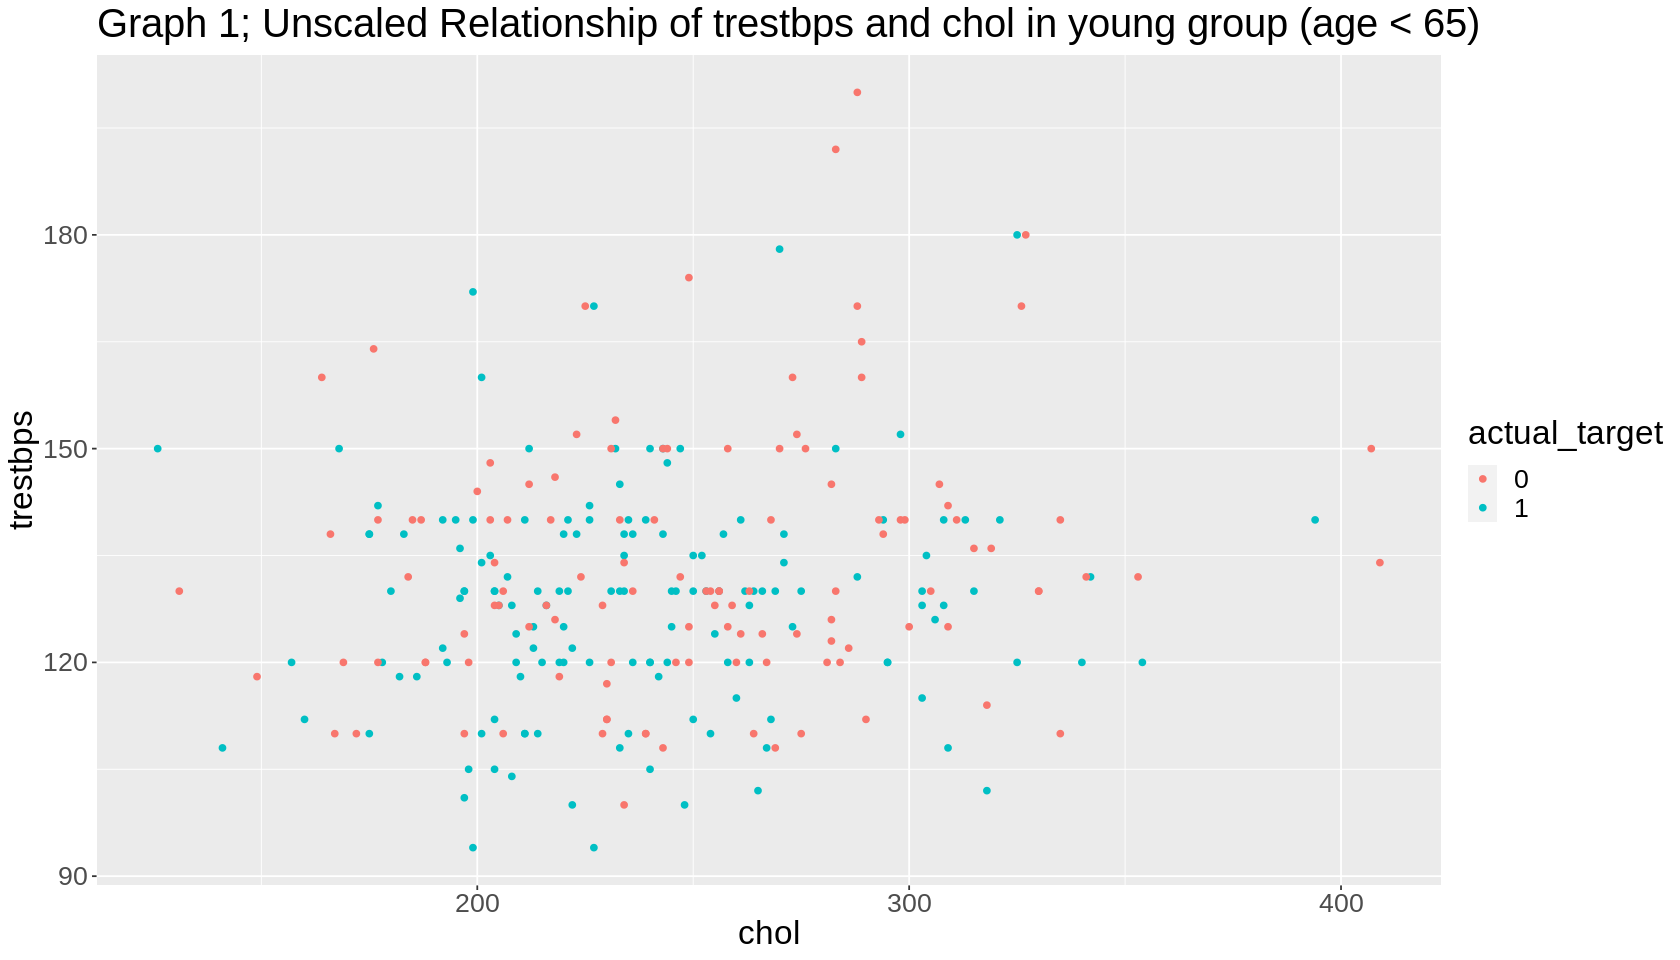

In [11]:
options(repr.plot.width=14, repr.plot.height=8)
HD_scatter_young <- ggplot(select_data_young, aes(x= chol, y = trestbps,  color = actual_target)) +
              geom_point() +
              xlab("chol") +
              ylab("trestbps") +
              ggtitle("Graph 1; Unscaled Relationship of trestbps and chol in young group (age < 65)") +
              theme(text = element_text(size=20))
HD_scatter_young


# pm_pairs <- select(select_data, temp, RH, wind, area) %>%
#             ggpairs()
# pm_pairs

Graph 1

Graph 1: A scatterplot of resting blood pressure (mm Hg) vs. serum cholesterol (mg/dl), using the unscaled data for age less than 65. The data points are colored based on their actual target value of heart disease (red for a negative diagnosis and blue for a positive diagnosis).

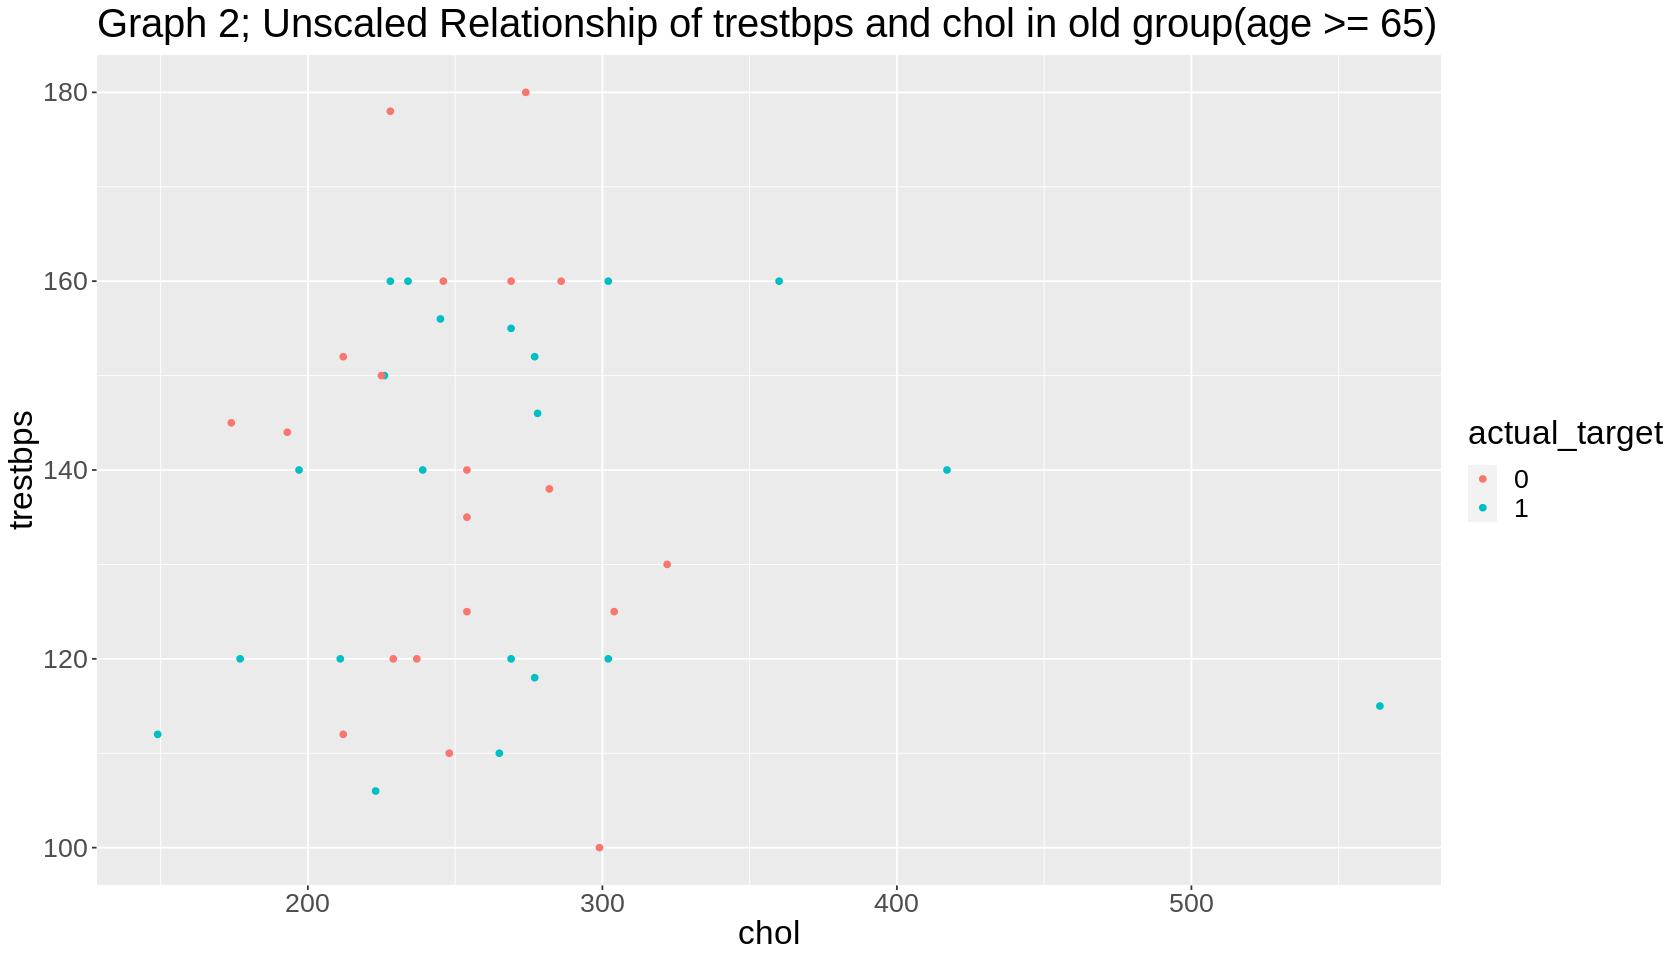

In [12]:
options(repr.plot.width=14, repr.plot.height=8)
HD_scatter_old <- ggplot(select_data_old, aes(x= chol, y = trestbps,  color = actual_target)) +
              geom_point() +
              xlab("chol") +
              ylab("trestbps") +
              ggtitle("Graph 2; Unscaled Relationship of trestbps and chol in old group(age >= 65)") +
              theme(text = element_text(size=20))
HD_scatter_old

Graph 2:  A scatterplot of resting blood pressure (mm Hg) vs. serum cholesterol (mg/dl) using the unscaled data for age 65 and over. The data points are colored based on their actual target value of heart disease (red for a negative diagnosis and blue for a positive diagnosis to make the classification more clear). 


In [13]:
reci <- recipe(actual_target ~ ., data = select_data_young)
young_recipe <- reci %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors()) %>%
  prep()
young_recipe
reci <- recipe(actual_target ~ ., data = select_data_old)
old_recipe <- reci %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors()) %>%
  prep()
old_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Training data contained 262 data points and no missing data.

Operations:

Scaling for age, trestbps, chol [trained]
Centering for age, trestbps, chol [trained]

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Training data contained 41 data points and no missing data.

Operations:

Scaling for age, trestbps, chol [trained]
Centering for age, trestbps, chol [trained]

Recipe for old and young:  We used a recipe to preprocess the data, specifying our target variable (actual_target) and using  “~.” to specify that all other variables in the data set are predictor variables.  Preprocessing includes scaling and centering all predictor variables to ensure they all have a mean of 0 and a standard deviation of 1.  This step was done twice, once for each data set (select_data_young and select_data_old). 


In [14]:
scaled_cancer_young <- bake(young_recipe, select_data_young)
scaled_cancer_young

scaled_cancer_old <- bake(old_recipe, select_data_old)
scaled_cancer_old

age,trestbps,chol,actual_target
<dbl>,<dbl>,<dbl>,<fct>
1.378119,0.84883872,-0.2260339,1
-1.954414,-0.04027007,0.1258553,1
-1.441717,-0.04027007,-0.8263153,1
⋮,⋮,⋮,⋮
-0.9290192,-1.22574845,0.4156463,0
0.6090726,-0.04027007,-2.3373687,0
0.6090726,-0.04027007,-0.1639358,0


age,trestbps,chol,actual_target
<dbl>,<dbl>,<dbl>,<fct>
-0.6567853,0.6008225,-0.5093555,1
0.3789146,0.1139900,-0.3214756,1
1.0693813,1.0876550,0.5890194,1
⋮,⋮,⋮,⋮
-0.3115520,-0.8596749,-0.3503802,0
-0.3115520,0.6981890,-0.7116878,0
0.0336813,0.3087230,-0.9862815,0


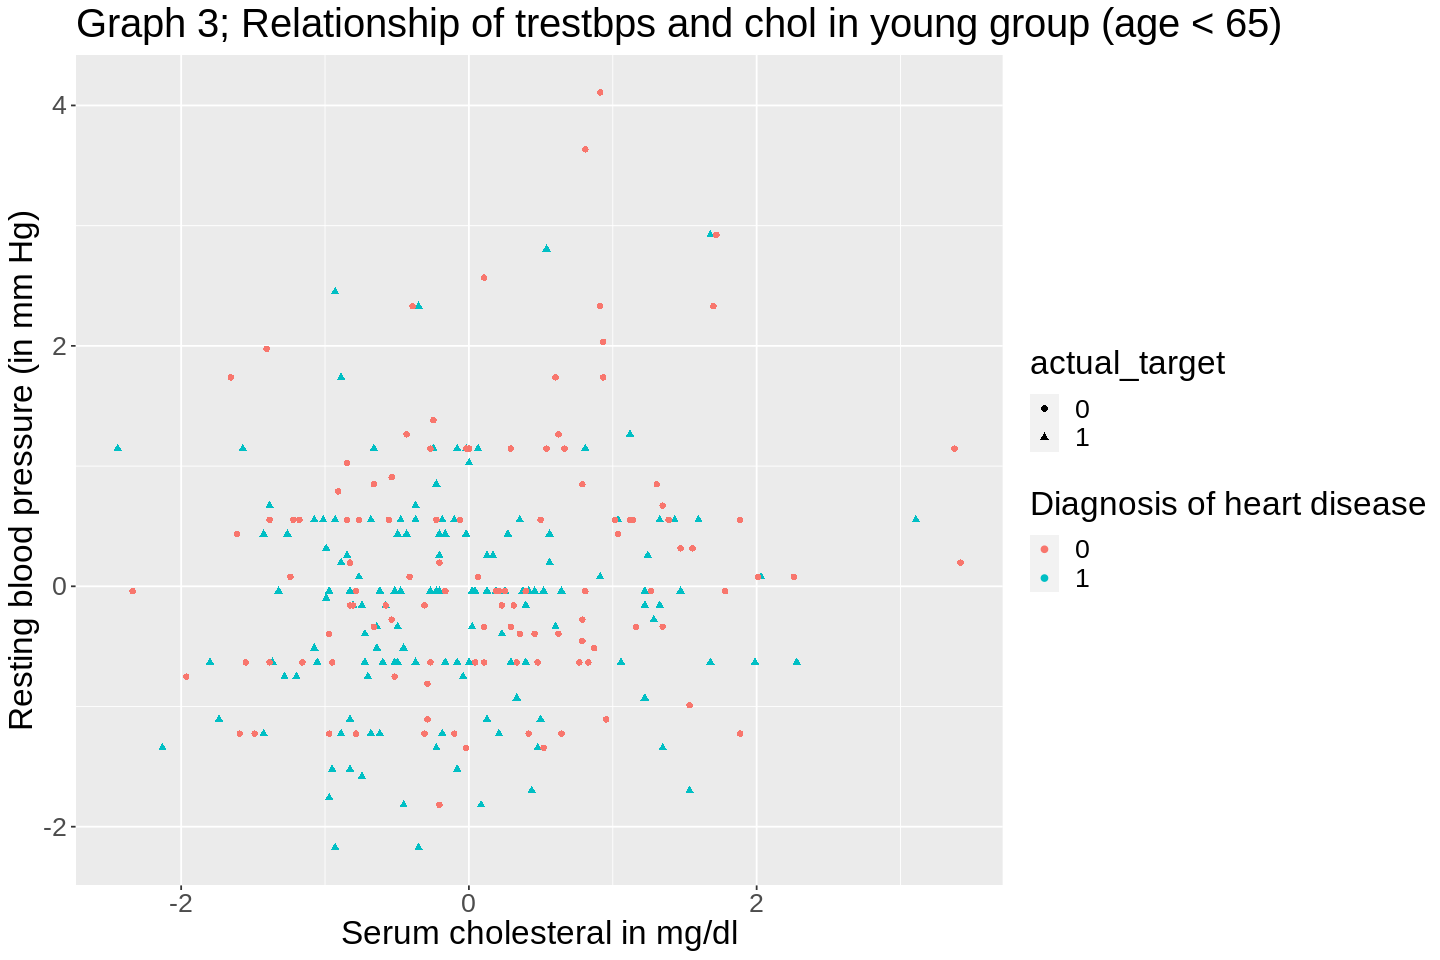

In [15]:
options(repr.plot.width=12, repr.plot.height=8)
HD_scatter_young <- ggplot(scaled_cancer_young, aes(x= chol, y = trestbps,  color = actual_target, shape = actual_target)) +
              geom_point() +
              labs(x = "Serum cholesteral in mg/dl",
                   y = "Resting blood pressure (in mm Hg)",
                   colour = "Diagnosis of heart disease") +
              theme(text = element_text(size=20)) +
              ggtitle("Graph 3; Relationship of trestbps and chol in young group (age < 65)")
HD_scatter_young

Graph 3

Graph 3: A scatterplot of resting blood pressure (mm Hg) vs. serum cholesterol (mg/dl), using the scaled data for age less than 65. The data points are colored and shaped based on their actual target value of heart disease  (red and circle for a negative diagnosis (0) and blue and triangle for a positive diagnosis (1) to make the classification more clear ). 

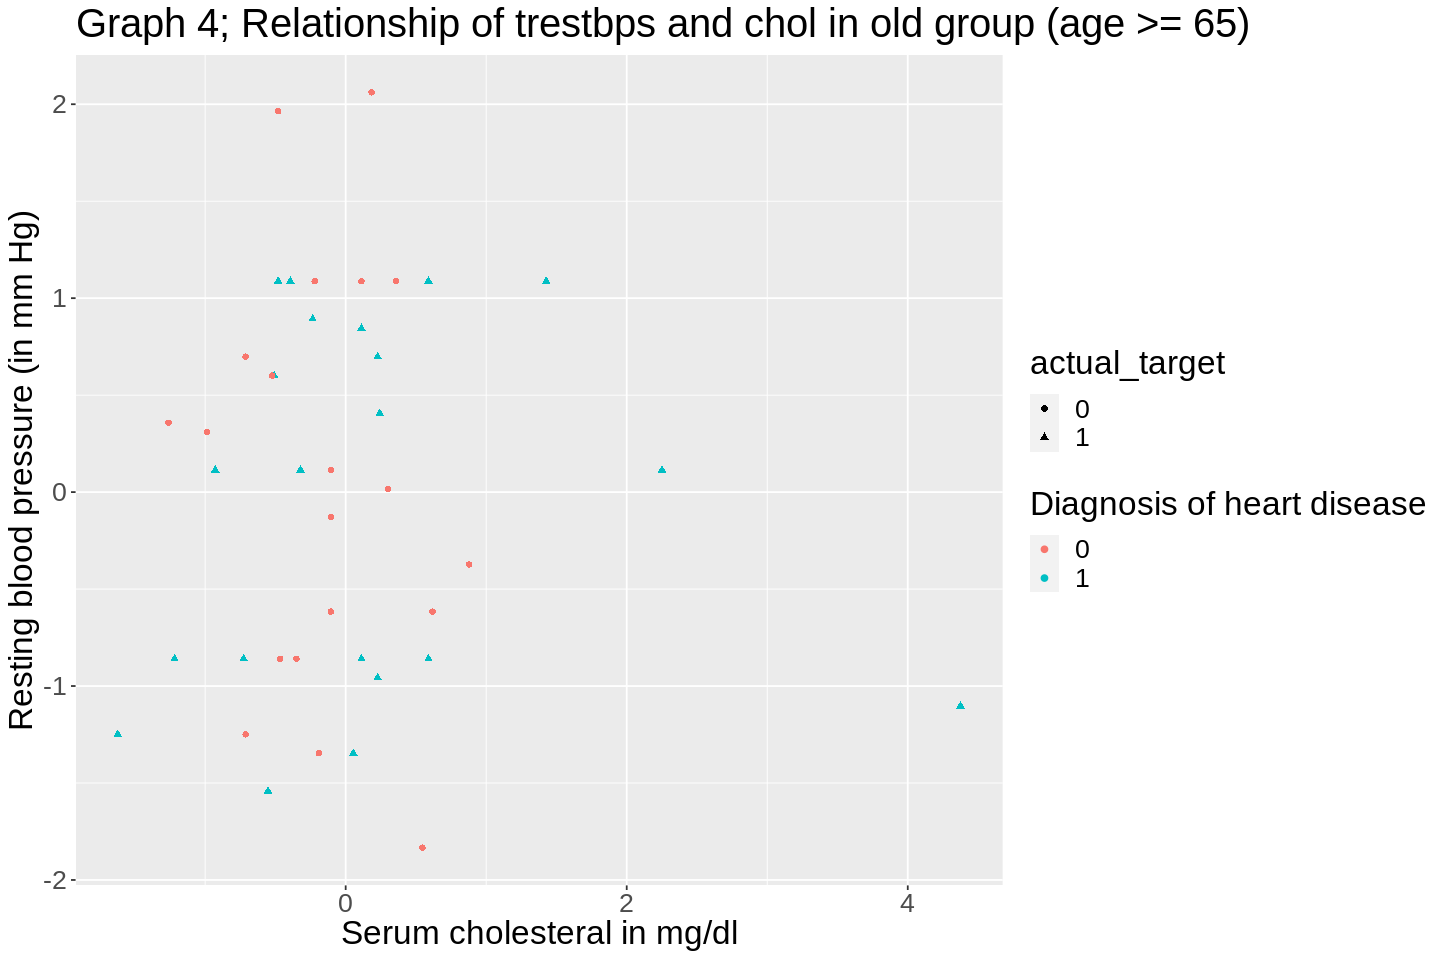

In [16]:
HD_scatter_old <- ggplot(scaled_cancer_old, aes(x= chol, y = trestbps,  color = actual_target, shape = actual_target)) +
              geom_point() +
              labs(x = "Serum cholesteral in mg/dl",
                   y = "Resting blood pressure (in mm Hg)",
                   colour = "Diagnosis of heart disease") +
              theme(text = element_text(size=20)) +
              ggtitle("Graph 4; Relationship of trestbps and chol in old group (age >= 65)")
HD_scatter_old

Graph 4

Graph 4: A scatterplot of resting blood pressure (mm Hg) vs. serum cholesterol (mg/dl) using the scaled data for age 65 and over. The data points are colored and shaped based on their actual target value of heart disease  (red and circle for a negative diagnosis (0) and blue and triangle for a positive diagnosis (1) to make the classification more clear ). 


In [17]:
Heart_disease_split <- initial_split(select_data, prop = 0.75, strata = actual_target)
Heart_disease_training <- training(Heart_disease_split)
Heart_disease_testing <- testing(Heart_disease_split)



 Initial_split was used to split the data set into a training data set (for creating and fitting the KNN model, and a testing data set to test the accuracy of the KNN model. We used 0.75 as our value for prop to split the data into 75% for training and 25% for testing and used strata to stratify the data by the target value. 75% will provide a solid amount of data to build our model while leaving enough data to verify our model. The training and testing functions create the training and testing data sets. 

In [18]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

We created a KNN model specification. We used the nearest neighbors function with straight line distance (wight_func= “rectangular”) and tune() for neighbors to find the best value for k during cross-validation. Since this is a KNN classification problem, the engine is set to K nearest neighbors (KNN) and the mode is set to classification.


In [19]:
Heart_disease_recipe <- recipe(actual_target ~ chol + trestbps, 
                        data = Heart_disease_training) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

We used a recipe to preprocess the training data, specifying our target variable, the diagnosis of heart disease (actual_target), and our predictor variables as cholesterol (chol) and resting blood pressure (trestbps).  We then scaled and centered both predictor variables to ensure they both have a mean of 0 and a standard deviation of 1.

In [20]:
Heart_disease_vfold_10 <- vfold_cv(Heart_disease_training, v = 10, strata = actual_target)

 Using the function vfold_cv, we performed a ten-fold (v=10) cross-validation to find the best value for K based on the training data set to predict our target variable (strat= actual_target). 10-fold cross-validation provides enough folds for a better accuracy estimate and lower standard error, while not having so many folds that the speed of the algorithm slows significantly.

In [21]:
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

A tibble of values of k from 1 to 100 by 5 was created for finding the best k value testing these values later in our workflow. We used “by = 5” to limit the slowing of the algorithm if too many k values are tested while trying to maximize accuracy, being justified as there will not be significant differences between k values of small separation  (such as k = 1 compared to k = 2). 

In [22]:
knn_fit <- workflow() %>%
           add_recipe(Heart_disease_recipe) %>%
           add_model(knn_spec) %>%
           tune_grid(resamples = Heart_disease_vfold_10, grid = k_vals) %>%
           collect_metrics()
knn_fit


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5356061,10,0.01970021,Model01
1,roc_auc,binary,0.5326923,10,0.01950231,Model01
6,accuracy,binary,0.5738636,10,0.02792232,Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
91,roc_auc,binary,0.5983974,10,0.03150147,Model19
96,accuracy,binary,0.5666667,10,0.02062530,Model20
96,roc_auc,binary,0.5871707,10,0.03046648,Model20


Table 7

We created a workflow to put together our recipe and model, and then used tune_grid to fit the model to each value from the tibble previously created. After, we collected the metrics to use later in a graph to see the accuracy of the model for each k value.


In [23]:
accuracies <- knn_fit %>%
  filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5356061,10,0.01970021,Model01
6,accuracy,binary,0.5738636,10,0.02792232,Model02
11,accuracy,binary,0.5988636,10,0.03482858,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
86,accuracy,binary,0.5882576,10,0.02438569,Model18
91,accuracy,binary,0.5840909,10,0.03074592,Model19
96,accuracy,binary,0.5666667,10,0.02062530,Model20


Table 8

We filtered the metrics for accuracy to be used in the following scatterplot. 


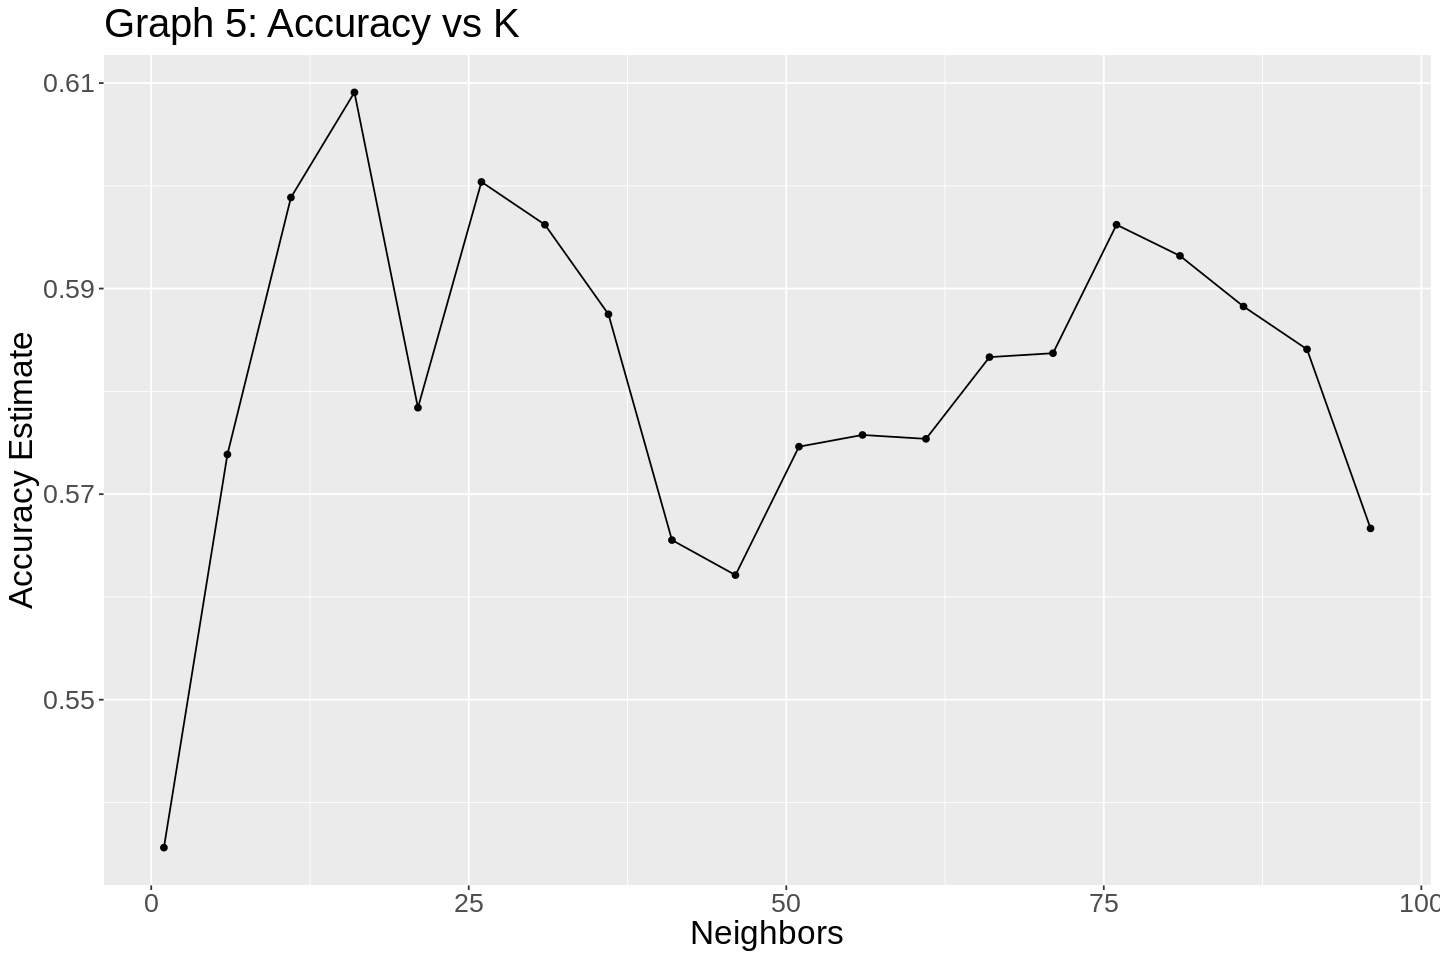

In [24]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 20)) +
  ggtitle("Graph 5: Accuracy vs K")

accuracy_vs_k

Graph 5

A line graph was used as it is an effective way to visualize trends, allowing the k number of neighbours with the highest accuracy to be easily seen. We used the accuracy data from the collect_metrics function performed in the workflow to make a scatterplot of accuracy vs. K (neighbors).


In [25]:
bestkk<- accuracies %>% 
         arrange(mean) %>%
         filter(mean > 0.60)
bestkk

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
26,accuracy,binary,0.6003788,10,0.02476969,Model06
16,accuracy,binary,0.6090909,10,0.01836503,Model04


Table 9

For table 9 based on Graph 5 we know that our best k is at when mean euqals to around 60. So filtering out the data that below 60 can help us to determine our best neighbour which in this case is 16.

In [26]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = 16) %>%
            set_engine("kknn") %>%
            set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 16
  weight_func = rectangular

Computational engine: kknn 


 We created another KNN model specification, this time using the best value of K (16 led to the highest accuracy). 

In [27]:
knn_fit <- workflow() %>%
  add_recipe(Heart_disease_recipe) %>%
  add_model(knn_spec) %>%
  fit(data = Heart_disease_training)
knn_fit


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~16, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3903509
Best kernel: rectangular
Best k: 16

We created a workflow to put together our recipe and new model, and then use fit to retrain the classifier onto the training data using the new model.

In [28]:
Heart_disesase_test_predictions <- predict(knn_fit, Heart_disease_testing) %>%
  bind_cols(Heart_disease_testing)
Heart_disesase_test_predictions

.pred_class,age,trestbps,chol,actual_target
<fct>,<dbl>,<dbl>,<dbl>,<fct>
0,57,120,354,1
0,52,172,199,1
0,48,130,275,1
⋮,⋮,⋮,⋮,⋮
1,59,134,204,0
1,55,128,205,0
0,44,120,169,0


Table 10

Using the predict function, we evaluated the accuracy of our knn model by using the model on the testing data set. Then we used bind_cols to combine the .pred_class column created from the predict function onto the testing data set. This puts our predicted values and actual values in one data set. 


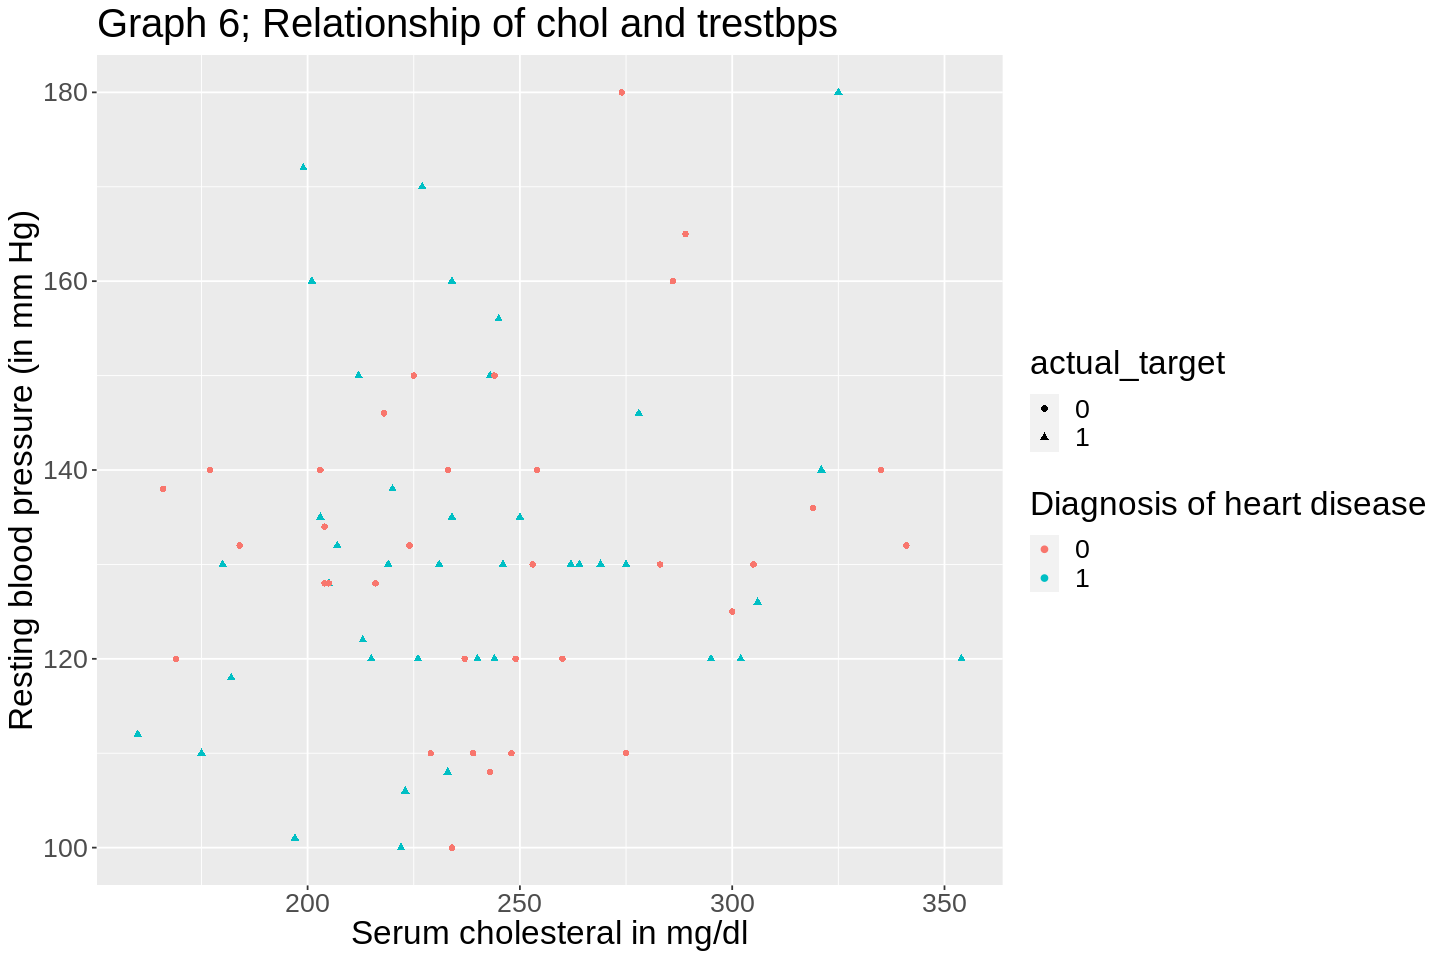

In [33]:
HD_scatter_old1 <- ggplot(Heart_disesase_test_predictions, aes(x= chol, y = trestbps,  color = actual_target, shape = actual_target)) +
                geom_point() +
              labs(x = "Serum cholesteral in mg/dl",
                   y = "Resting blood pressure (in mm Hg)",
                   colour = "Diagnosis of heart disease") +
              theme(text = element_text(size=20)) +
              ggtitle("Graph 6; Relationship of chol and trestbps")
HD_scatter_old1

Graph 6

In [30]:
Heart_disesase_predictions <- Heart_disesase_test_predictions %>%
                              metrics(truth = actual_target, estimate = .pred_class) %>%
                              filter(.metric == "accuracy")
Heart_disesase_predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.44


Table 11

In [31]:
confusion <- Heart_disesase_test_predictions %>%
             conf_mat(truth = actual_target, estimate = .pred_class)
confusion

          Truth
Prediction  0  1
         0 12 20
         1 22 21

Table 12 

We use conf_mat to calculat confusion matrix, truth represents the true value that we have and estimate represents the prediction we made. Based on these two values we can calculat whether our matrix is reliable or not. The confusion matrix shows 12 observations were correctly predicted heart disease, and 21 were correctly predicted as healthy. it also contains certain mistakes. it classified 22 observations have heart disease when they were not, and 20 observations as helthy when they avtually have heart disease.

In [32]:
False_negative <- 20 / (12 + 20 + 22 + 21)
False_negative

[1] 0.2666667

We want to calculate the portion of false negetive which means the patient does have heart disease but we diagonized it as healthy. We want to know the reliability of our model in this case is about 27%